# Introduction to Data Science, CS 5963 / Math 3900
## Lab 12: Clustering 

In this lab, we'll cluster the MNIST handwritten digits using methods from the scikit-learn library. 

This lab is, in part, based on [this scikit-learn demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html). 

In [1]:
from time import time
import numpy as np

from sklearn.cluster import *
# from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

### The dataset

THE MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. 

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) describes a variety of different classification results on MNIST (Note, the tests on this website are for a larger and higher resolution dataset than we'll use.) To see a comparison of classification methods implemented in scikit-learn on the MNIST dataset, see 
[this page](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).
The MNIST dataset is also a frequently used for benchmarking clustering algorithms and because it has labels, we can evaluate the homogeneity or purity of the clusters. 

There are several versions of the dataset. We'll use the one that is built-in to scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10  
* Samples per class: $\approx$180
* Samples total: 1797
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">


<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


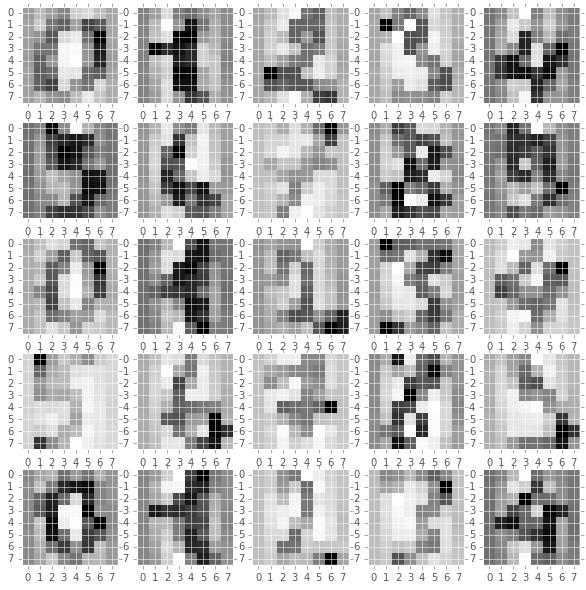

In [3]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

### k-means clustering
We first use k-means method to cluster the dataset and compute the homogeneity score for the clustering. 

In [12]:
# fit k-means to data
kmeans_model = KMeans(n_clusters=n_digits, n_init=10)
kmeans_model.fit(X)

# use labels to compute homogeneity score
metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_model.labels_)

0.67289211104963287

### Hierarchical clustering
**Exercise:** Use a hierarchical clustering method to cluster the dataset. Again compute the homogeneity. *Hint:* Use the scikit-learn function *AgglomerativeClustering*.  

In [20]:
# SOLUTION 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score


agg_cluster_model = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=n_digits)
y_pred = agg_cluster_model.fit_predict(X)

metrics.homogeneity_score(labels_true=y, labels_pred=agg_cluster_model.labels_)



0.75849140703260054

### Other clustering methods
Take a look at the clustering methods and options for various methods on the [scikit-learn page](http://scikit-learn.org/stable/modules/clustering.html). 

**Exercise:** By modifying the following code, try to find the clustering method with the largest homogeneity score for this dataset. 

In [21]:
print(50 * '_')
print('% 9s' % 'method' + '                   time' + '      homo')
def compare_method(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 25s   %.2fs     %.3f ' % (name, (time() - t0), metrics.homogeneity_score(y, estimator.labels_)))

compare_method(KMeans(init='k-means++', n_clusters=n_digits, n_init=10), name="k-means++", data=X)
compare_method(KMeans(init='random', n_clusters=n_digits, n_init=10), name="random", data=X)
compare_method(AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=n_digits), name = 'Agg Cluster', data=X)

__________________________________________________
   method                   time      homo
                k-means++   0.29s     0.604 
                   random   0.33s     0.603 
              Agg Cluster   1.88s     0.758 


### Visualization via PCA
Here we'll use PCA in conjunction with clustering to visualize a clustering. 

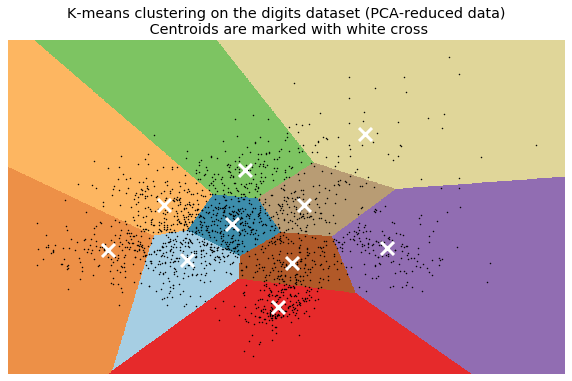

0.458288534366


In [7]:
X_PCA = PCA(n_components=2).fit_transform(X)
kmeans_model = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans_model.fit(X_PCA)  #this puts the data in 2 dimensions instead of 64

# Plot the decision boundaries. For that, we will assign a color to each point in a mesh
x_min, x_max = X_PCA[:, 0].min() - 1, X_PCA[:, 0].max() + 1
y_min, y_max = X_PCA[:, 1].min() - 1, X_PCA[:, 1].max() + 1
h = .02     # step size of the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_PCA[:, 0], X_PCA[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans_model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

print(metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_model.labels_))

### Plotting cluster centers and cluster representatives
In this case, the features are just the pixels, so we can plot the cluster centers. 

A related idea is the notion of a cluster representative, which is not available via the k-means clustering method. A *cluster representative* or *cluster exemplar*  is an element from the cluster which "represents" that cluster. Representatives are a powerful idea for data summary. The affinity propagation method for clustering provides cluster representatives. 

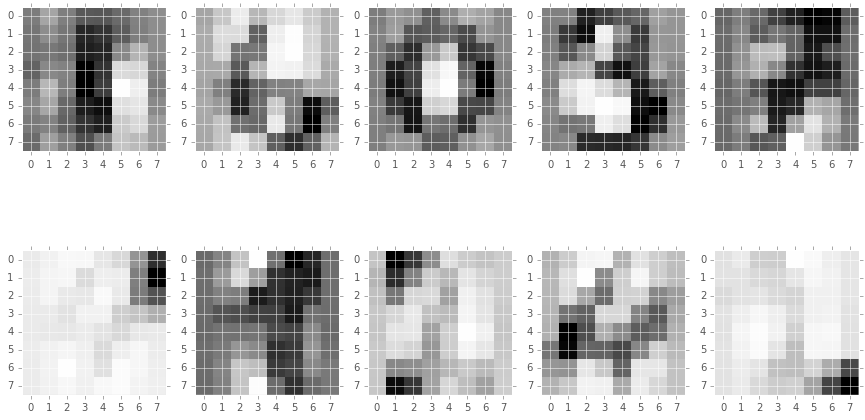

In [22]:
# fit k-means to data
kmeans_model = KMeans(n_clusters=n_digits, n_init=10)
kmeans_model.fit(X)

# use labels to compute homogenity score
metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_model.labels_)

plt.figure(figsize= (15,8))
for ii in np.arange(10):
    plt.subplot(2, 5, ii+1)
    plt.imshow(np.reshape(kmeans_model.cluster_centers_[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

In [24]:
# fit affinity propogation clustering to data
aff_prop_model = AffinityPropagation()
aff_prop_model.fit(X)

# use labels to compute homogenity score
metrics.homogeneity_score(labels_true=y, labels_pred=aff_prop_model.labels_)

print(aff_prop_model)

cluster_centers_indices = aff_prop_model.cluster_centers_indices_
print(len(cluster_centers_indices))

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)
131


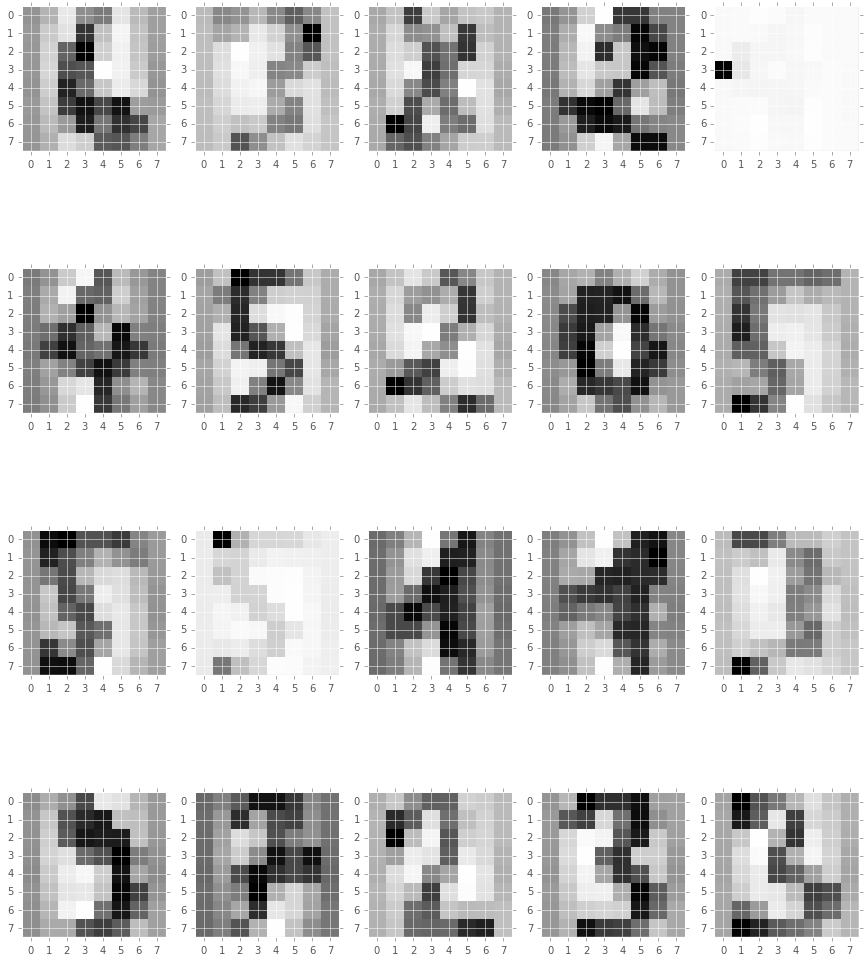

In [25]:
# plot the first 20 cluster representatives
plt.figure(figsize= (15,18))
for ii in np.arange(20):
    cluster_center = X[cluster_centers_indices[ii]]
    plt.subplot(4, 5, ii+1)
    plt.imshow(np.reshape(cluster_center,(8,8)), cmap='Greys',interpolation='none')
plt.show()